<a href="https://colab.research.google.com/github/Hoyadeath/practice_AI/blob/main/TADP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#사전 작업

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts,

In [20]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

#데이터 전처리


In [21]:
#import 및 파일 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

plt.rc('font', family='NanumGothic')

file_path = "/content/drive/MyDrive/Colab Notebooks/01 DATA/accidentInfoList.CSV"
df = pd.read_csv(file_path, encoding='cp949')


In [22]:
# 숫자 추출 함수 생성
def extract_numbers_from_age(age):
    numbers = re.findall(r'\d+', str(age))
    if numbers:
        return int(numbers[0])
    else:
        return np.nan

# 문자 데이터 제거 및 숫자만 추출
df['가해운전자 연령'] = df['가해운전자 연령'].apply(extract_numbers_from_age)
df['피해운전자 연령'] = df['피해운전자 연령'].apply(extract_numbers_from_age)
mean_age_driver = round(df['가해운전자 연령'].mean(), 1)
mean_age_victim = round(df['피해운전자 연령'].mean(), 1)

# 결측치 처리
df['가해운전자 연령'].fillna(mean_age_driver, inplace=True)
df['피해운전자 연령'].fillna(mean_age_victim, inplace=True)
df['피해운전자 차종'].fillna('NaN', inplace=True)
df['피해운전자 성별'].fillna('NaN', inplace=True)
df['피해운전자 상해정도'].fillna('상해없음', inplace=True)

In [23]:
# 피쳐 생성
df['ECLO'] = df['사망자수'] * 10 + df['중상자수'] * 5 + df['경상자수'] * 3 + df['부상신고자수'] * 1

# '사고일시' 열에서 시간 정보 추출
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')
df['사고발생시간'] = df['사고일시'].dt.hour

In [24]:
#원핫 인코딩
categorical_features = ['요일']
encoded_df = pd.get_dummies(df[categorical_features])
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)

In [25]:
### 테스트
df.info()
df.describe()
df.

SyntaxError: invalid syntax (<ipython-input-25-57daf0e26f7a>, line 4)

#시각화 자료 준비

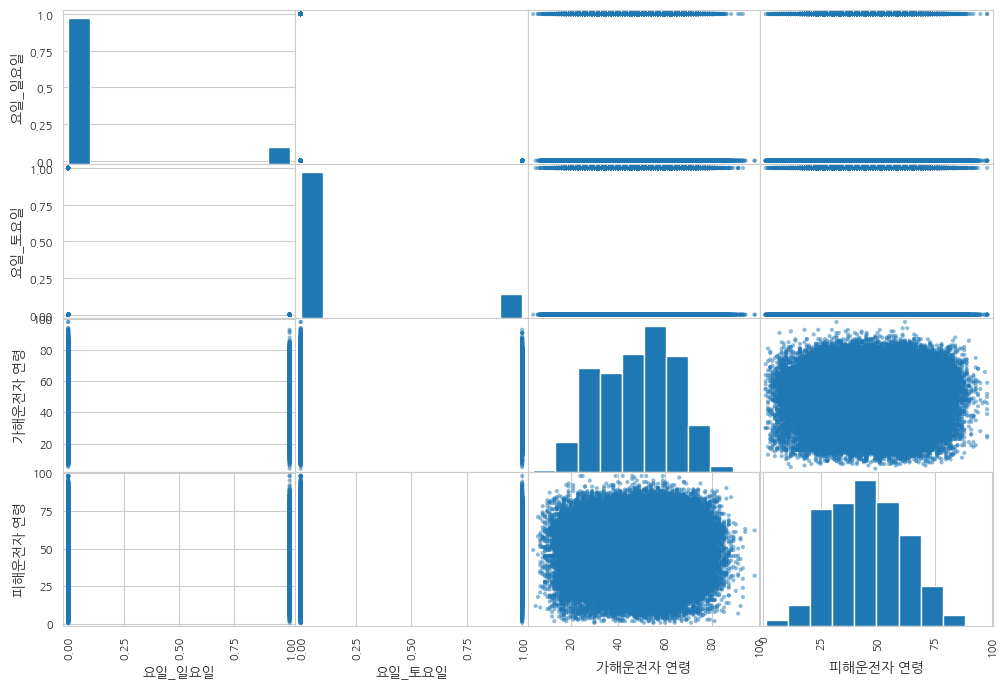

In [26]:
#################################################
from pandas.plotting import scatter_matrix

attributes = ['요일_일요일', '요일_토요일', '가해운전자 연령', '피해운전자 연령']
scatter_matrix(df[attributes], figsize=(12, 8));

In [27]:
df.describe()

,사고번호,사망자수,중상자수,경상자수,부상신고자수,가해운전자 연령,피해운전자 연령,ECLO,사고발생시간,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일
count,1.028380e+05,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000,102838.000000
mean,2.021053e+15,0.006642,0.240174,1.002849,0.099525,48.195292,45.177798,4.375357,13.917462,0.162498,0.151082,0.148826,0.142175,0.103298,0.143828,0.148291
std,8.200197e+11,0.082767,0.475781,0.901556,0.344325,15.736685,15.942403,2.891882,5.869169,0.368909,0.358131,0.355919,0.349231,0.304350,0.350917,0.355390
min,2.020010e+15,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020092e+15,0.000000,0.000000,0.000000,0.000000,35.000000,32.000000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.021062e+15,0.000000,0.000000,1.000000,0.000000,49.000000,45.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.022041e+15,0.000000,0.000000,1.000000,0.000000,61.000000,57.000000,5.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.022123e+15,3.000000,11.000000,25.000000,17.000000,98.000000,98.000000,105.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='가해운전자 연령', ylabel='ECLO'>

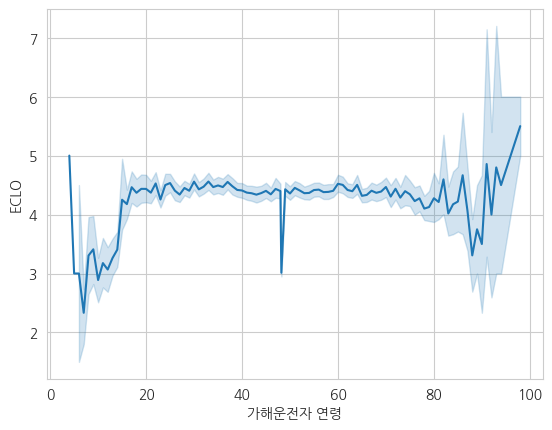

In [42]:
sns.lineplot(x = '가해운전자 연령', y = 'ECLO', data = df)

In [29]:
sns.lineplot(x = '요일_일요일', '요일_일요일', y = 'ECLO', data = df)

SyntaxError: positional argument follows keyword argument (<ipython-input-29-73ce9d0be3ea>, line 1)

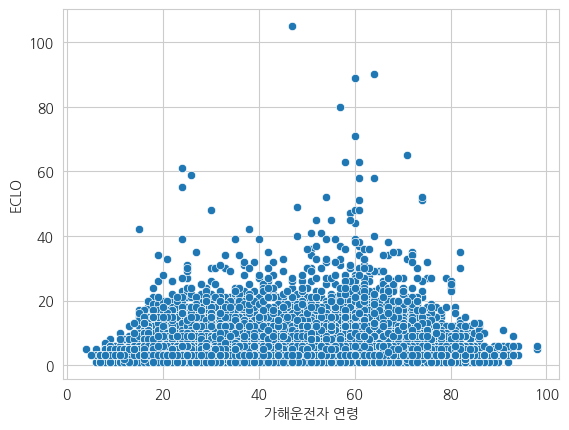

In [30]:
# ECLO와 비교하기 쉬움
sns.scatterplot(x = '가해운전자 연령', y = 'ECLO', data = df);

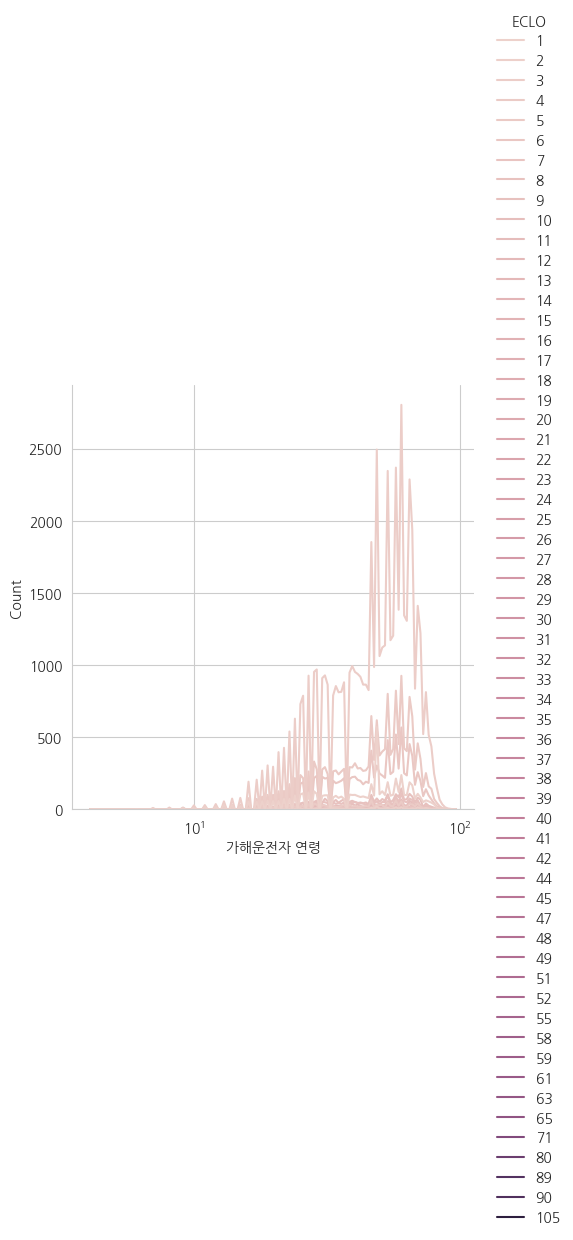

In [49]:
sns.displot(x='가해운전자 연령', hue='ECLO', log_scale=True,
            element='poly', fill=False, data=df)

In [ ]:
sns.boxplot(x = '가해운전자 연령', y = 'ECLO', data = df)

<ipython-input-33-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


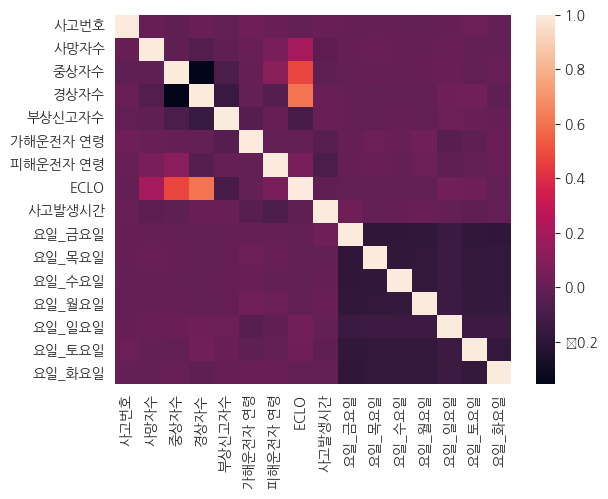

In [33]:
sns.heatmap(df.corr())

<Axes: xlabel='가해운전자 성별', ylabel='ECLO'>

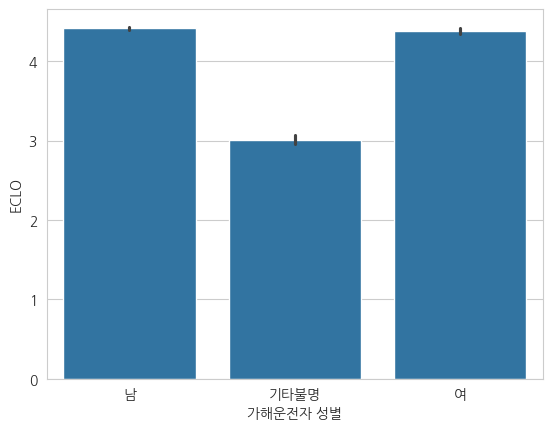

In [34]:
sns.barplot(x = '가해운전자 성별', y= 'ECLO', data = df)


<Axes: xlabel='가해운전자 성별', ylabel='가해운전자 성별'>

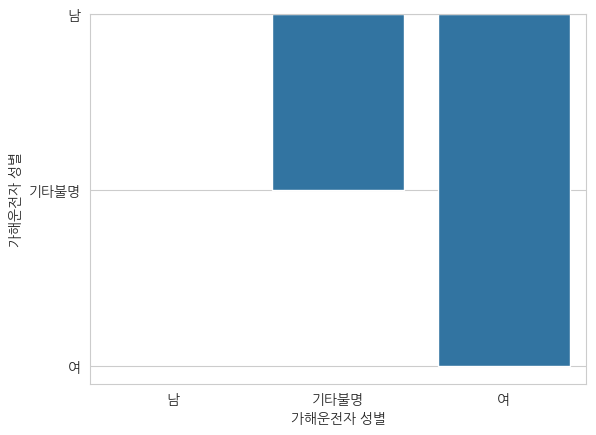

In [35]:
sns.barplot(x = '가해운전자 성별', y= '가해운전자 성별', data = df)

<Axes: xlabel='요일_일요일', ylabel='ECLO'>

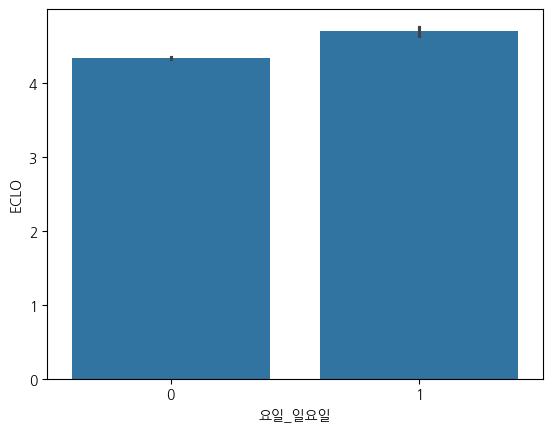

In [41]:
sns.barplot(x = '요일_일요일', y= 'ECLO', data = df)

#모델링

In [ ]:
# 피처 선택
features = ['요일_일요일', '요일_토요일', '가해운전자 연령', '피해운전자 연령']

# 독립변수와 종속변수 분할
X = df[features]
y = df['ECLO']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 이상치 제거
z_scores = np.abs(stats.zscore(df['ECLO']))
outliers = (z_scores > 3)
df_no_outliers = df[~outliers]

# 독립변수와 종속변수 다시 설정
X_no_outliers = df_no_outliers[features]
y_no_outliers = df_no_outliers['ECLO']

# 데이터 분할
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)


In [ ]:
# 모델 생성 및 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train_no_outliers, y_train_no_outliers)

# 모델 평가
y_pred = model.predict(X_test_no_outliers)
mse = mean_squared_error(y_test_no_outliers, y_pred)
mae = mean_absolute_error(y_test_no_outliers, y_pred)
r2 = r2_score(y_test_no_outliers, y_pred)

print("Mean Squared Error without outliers:", mse)
print("Mean Absolute Error without outliers:", mae)
print("R² Score without outliers:", r2)

# 중요도 확인
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

#SUB

In [36]:
print(df.columns.tolist())

['사고번호', '사고일시', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', 'ECLO', '사고발생시간', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일', '요일_일요일', '요일_토요일', '요일_화요일']


In [37]:
#임시 저장
output_file_path = "/content/drive/MyDrive/Colab Notebooks/01 DATA/modified_accidentInfoList.csv"
df.to_csv(output_file_path, index=False)

<Axes: xlabel='ECLO'>

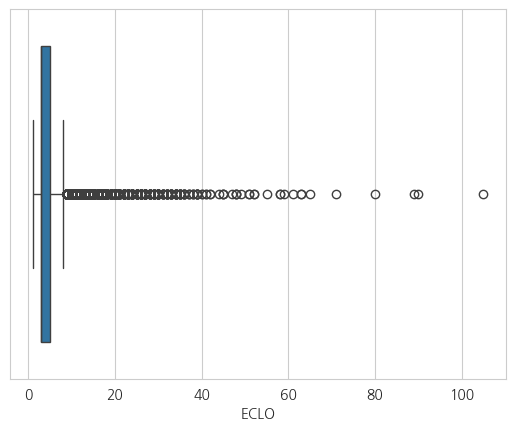

In [39]:
#####################
sns.boxplot(x='ECLO', data=df)